### Optymalizacja - problem przeszukiwania

Lista skupia się na implementacji dwóch algorytmów z wykorzystaniem heurystyk i jednej metaheurystyki w problemie odnajdywania najkrótszych ścieżek

#### Założenia
Jednym z problemów jest uwzględnienie czasu przesiadki do innej linii lub na pobliski przystanek - tutaj zostały rozważone dwa podejścia, gdzie nie dodajemy czasu przesiadki (0 s.) oraz gdzie go dodajemy (60 s.). Prowadzi to do interesujących wniosków. Kolejnym z założeń jest to, że będąc na przystanku o danej nazwie mogę się przejść na pobliski przystanek o tej samej nazwie - dzięki temu odkrywane jest więcej połączeń. Również w przypadku optymalizacji liczby połączeń przyjęto, że nie ma znaczenia o której pojazd odjeżdża oraz jaki jest czas oczekiwania między przesiadkami.

#### Zbiór testowy
ALgorytmy zostały przetestowane na zbiorze 18-stu przejazdów o różnych poziomach skomplikowania trasy

#### 1. Dijkstra 

Jest to algorytm zachłanny wybierający zawsze węzeł o najmniejszej wartości funkcji kosztu $f$. W tym przypadku wykorzystana została zmodyfikowana implementacja, która jest oparta na kolejce priorytetowej. 

Sama idea przeszukiwania wierzchołków w optymalizacji czasu sprowadza się do następujących kroków:
1. Zainicjalizuj kolejkę przystankiem początkowym (z odpowiadającym sztucznym połączeniem)
2. Wybierz przystanek o najmniejszym koszcie - koszt jest obliczany na podstawie najszybszego połączenia, które nas doprowadzi do tego przystanku
3. Dla tego przystanku rozważ najszybsze połączenia z *wszystkich* przystanków o tej nazwie do sąsiadujących przystanków, które jeszcze nie zostały odwiedzone
4. Dodaj ten przystanek do listy odwiedzonych
2. Powtarzaj póki kolejka nie jest pusta

In [2]:
import pandas as pd
import numpy as np
from ai_data_eng.searching.globals import *
from ai_data_eng.searching.utils import *
import matplotlib.pyplot as plt 
RESULTS = DATA_DIR / 'debug-new'

In [3]:
header = ['start_stop', 'goal_stop', 'commuting_time', 'changes', 'elapsed_time', 'cost', 'change_time']
dij = pd.read_csv(RESULTS / 'dijkstra/summary0', names=header)

In [4]:
dij

,start_stop,goal_stop,commuting_time,changes,elapsed_time,cost,change_time
0,PL. GRUNWALDZKI,most Grunwaldzki,00:01:00,0,2.95,60,0
1,PL. GRUNWALDZKI,Renoma,00:09:00,1,7.46,540,0
2,KLECINA,OSIEDLE SOBIESKIEGO,00:54:00,5,43.30,3240,0
3,Broniewskiego,Uniwersytet Ekonomiczny,00:32:00,3,29.88,1920,0
4,POŚWIĘTNE,Młodych Techników,00:27:00,2,15.40,1620,0
5,Śliczna,Marchewkowa,01:01:00,3,32.38,3660,0
6,KOSZAROWA (Szpital),Buforowa-Rondo,02:06:00,5,47.44,7560,0
7,Wilczyce - Dębowa,Marszowicka,05:42:00,6,45.87,20520,0
8,Zabrodzie - pętla,Wiślańska,01:53:00,6,41.44,6780,0
9,Maślicka (Osiedle),Iwiny - Kolejowa,01:08:00,8,45.86,4080,0


### 2. A$^{*}$

Implementacja tego algorytmu różni się od tej teoretycznej - jest również oparta na kolejce priorytetowej, gdzie waga wierzchołka jest równa $f + g$, gdzie g to użyta heurystyka. 

##### Optymalizacja czasu 
W tym przypadku logika jest podobna jak w dijkstrze, gdzie użyta heurystyka stara się oszacować pozostały czas. Jest to trudne ponieważ nie wiemy z jaką prędkością porusza się środek transportu oraz jak zawiła jest jego trasa. Na podstawie eksperymentów została wybrana heurystyka, która przyjmuje dwa hiperparametry - $v$ oraz $alpha$, gdzie $v$ to początkowa, przeszacowana prędkość a $alpha$ to mały współczynnik aktualizacji prędkości o chwilową prędkość aktualnego połączenia. Jest to więc heurystyka 'ucząca' się a parametry zostały wybrane na podstawie paru różnych tras. Problemem jest jednak udowodnienie, że jest to heurystyka optymistyczna, więc najlepszym środkiem jest porównanie wyników do działania dijsktry

In [5]:
a_star_t = pd.read_csv(RESULTS / 'a-star-t/summary0', names=header)

In [6]:
a_star_t

,start_stop,goal_stop,commuting_time,changes,elapsed_time,cost,change_time
0,PL. GRUNWALDZKI,most Grunwaldzki,00:01:00,0,3.05,60,0
1,PL. GRUNWALDZKI,Renoma,00:09:00,1,4.36,540,0
2,KLECINA,OSIEDLE SOBIESKIEGO,00:54:00,5,19.00,3240,0
3,Broniewskiego,Uniwersytet Ekonomiczny,00:32:00,3,15.01,1920,0
4,POŚWIĘTNE,Młodych Techników,00:27:00,2,8.88,1620,0
5,Śliczna,Marchewkowa,01:01:00,3,26.03,3660,0
6,KOSZAROWA (Szpital),Buforowa-Rondo,02:06:00,5,29.53,7560,0
7,Wilczyce - Dębowa,Marszowicka,05:43:00,5,44.51,20580,0
8,Zabrodzie - pętla,Wiślańska,01:53:00,6,26.19,6780,0
9,Maślicka (Osiedle),Iwiny - Kolejowa,01:08:00,8,28.85,4080,0


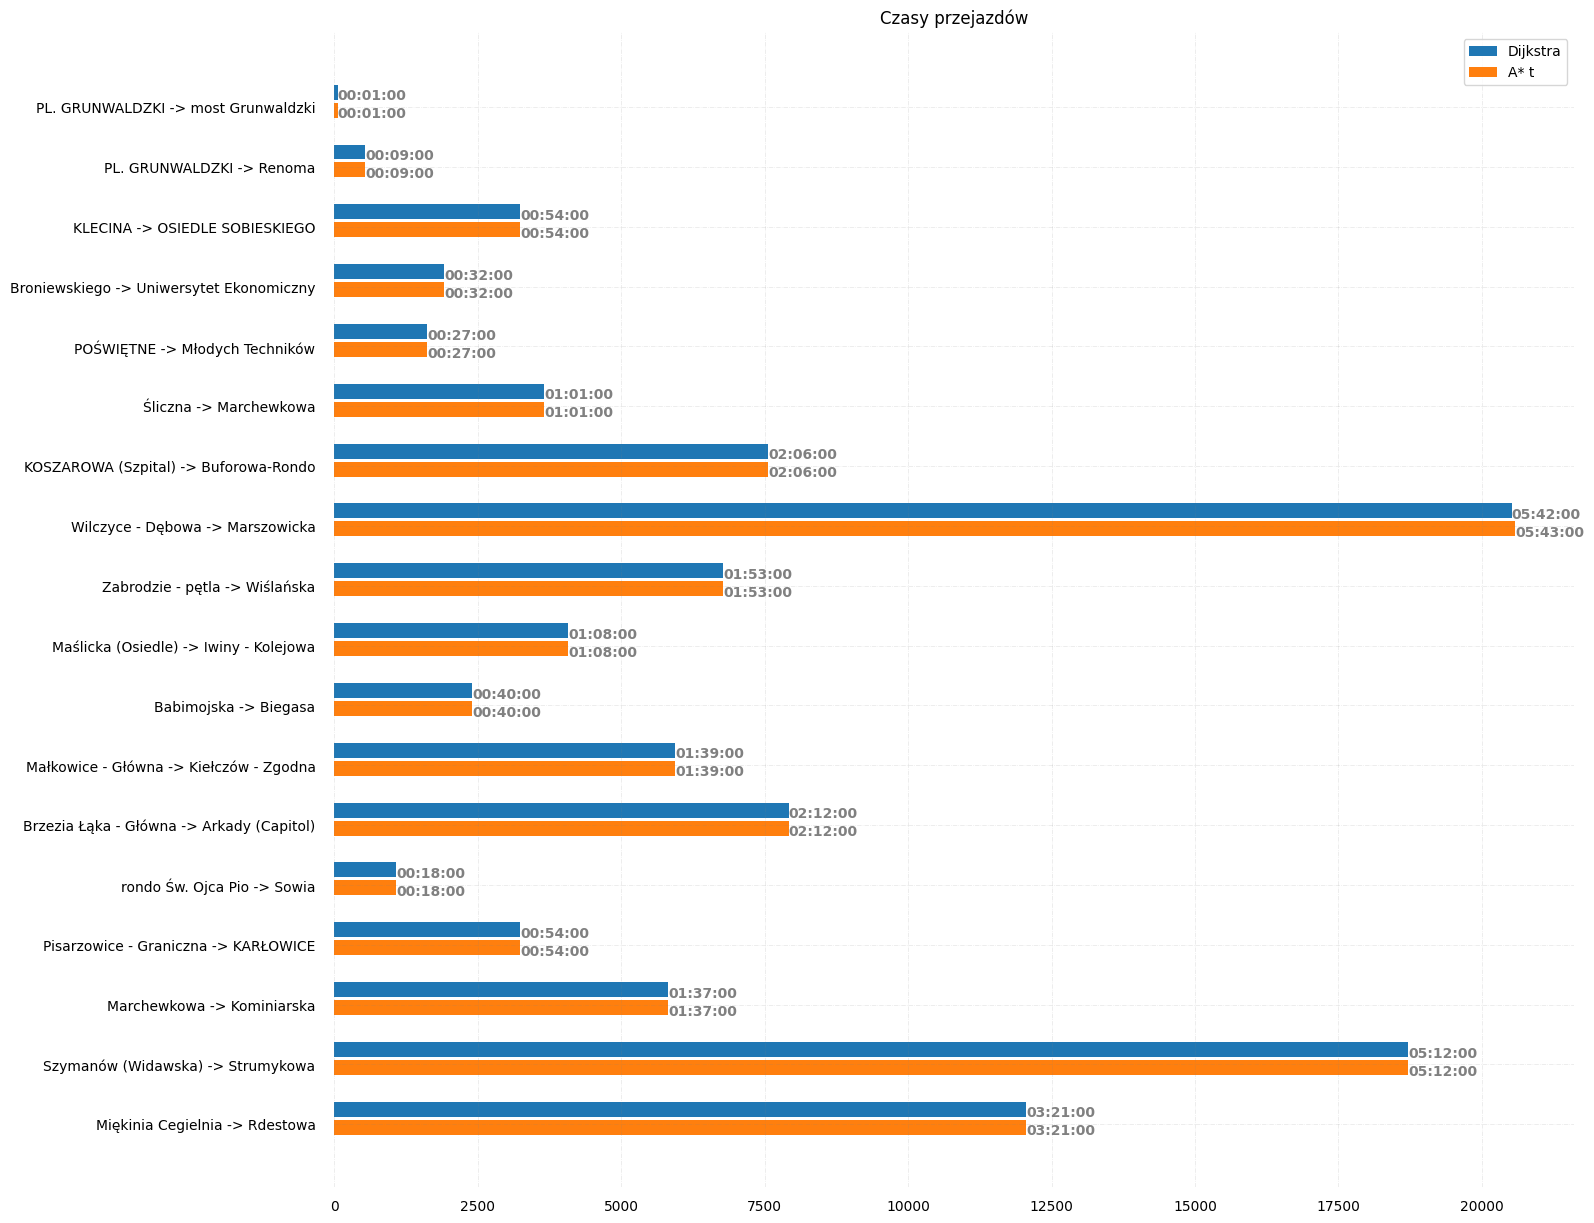

In [7]:
def bar_plot_compare(algorithms, names, col_idx, title, formatter, display_annotation=False):
    fig, ax = plt.subplots(figsize =(16, 15))
    bar_width = 0.25
    spacing = 0.3
    n = len(algorithms[0])
    
    for i, (alg, name) in enumerate(zip(algorithms, names)):
    # Horizontal Bar Plot
        x = i * spacing + np.arange(len(alg))
        ax.barh(x, alg.iloc[:, col_idx].apply(formatter), bar_width, 
                label=f'{name}')
        
    x = bar_width + np.arange(n)
    plt.yticks(x, algorithms[0]['start_stop'] + ' -> ' + (algorithms[0]['goal_stop']))
     
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
     
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
     
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
     
    # Add x, y gridlines
    ax.grid(color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
     
    # Show top values 
    ax.invert_yaxis()
     
    # Add annotation to bars
    if display_annotation:
        for j, i in enumerate(ax.patches):
            plt.text(i.get_width()+0.5, i.get_y() + bar_width, 
                     algorithms[j // n].iloc[j % n, col_idx],
                     fontsize = 10, fontweight ='bold',
                     color ='grey')
     
    # Add Plot Title
    ax.set_title(title)
     
    plt.legend()
    # Show Plot
    plt.show()
    
bar_plot_compare([dij, a_star_t], ['Dijkstra', 'A* t'], col_idx=2, title='Czasy przejazdów', formatter=time_to_normalized_sec, display_annotation=True)

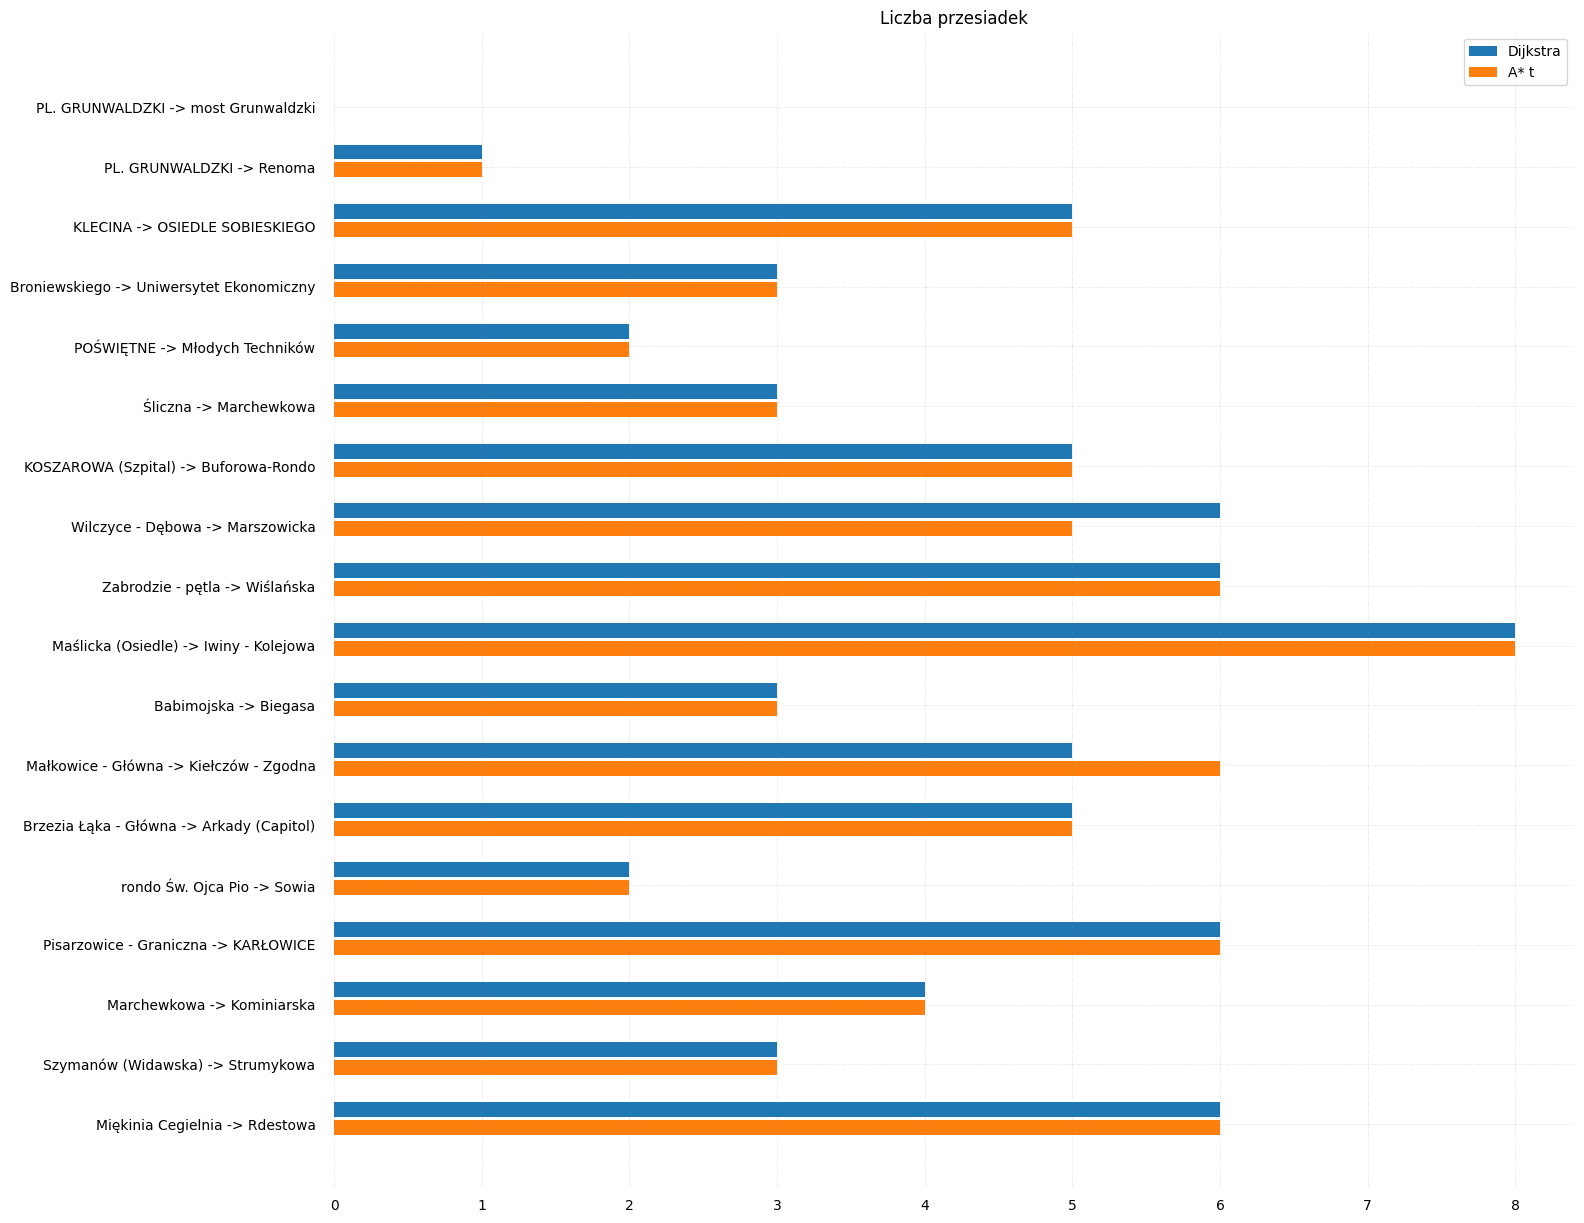

In [8]:
bar_plot_compare([dij, a_star_t], ['Dijkstra', 'A* t'], col_idx=3, title='Liczba przesiadek', formatter=int, display_annotation=False)

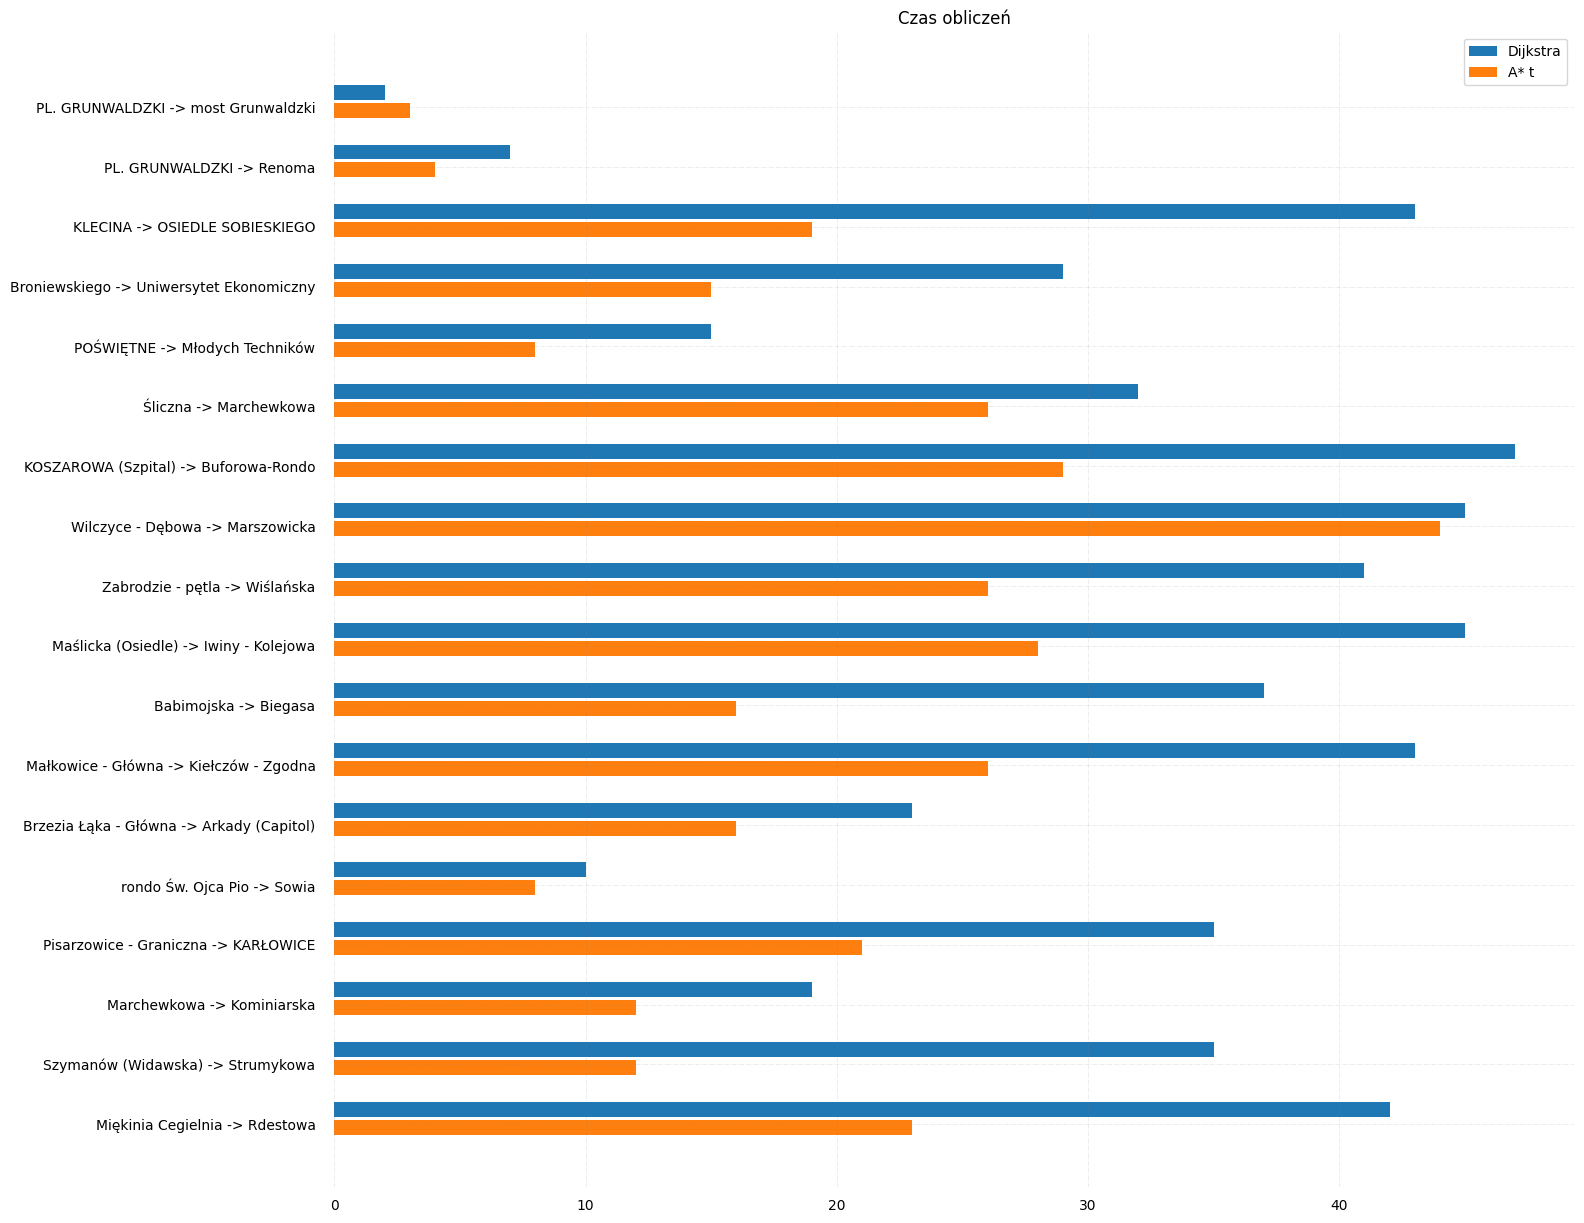

In [9]:
bar_plot_compare([dij, a_star_t], ['Dijkstra', 'A* t'], col_idx=4, title='Czas obliczeń', formatter=int, display_annotation=False)

#### Modyfikacja - dodanie czasu przesiadki 

W celu urealnienia sytuacji zmiany linii dodano do algorytmów stałą wartość przesiadki - 1 min. Można zauważyć, że zadziałało to w sposób regulujący liczbę przesiadek w algorytmach z optymalizacją tylko czasu, ale w niektórych przypadkach zwiększyło czas przejazdu. 

In [10]:
a_star_t_60 = pd.read_csv(RESULTS / 'a-star-t/summary60', names=header)
dij_60 = pd.read_csv(RESULTS / 'dijkstra/summary60', names=header)

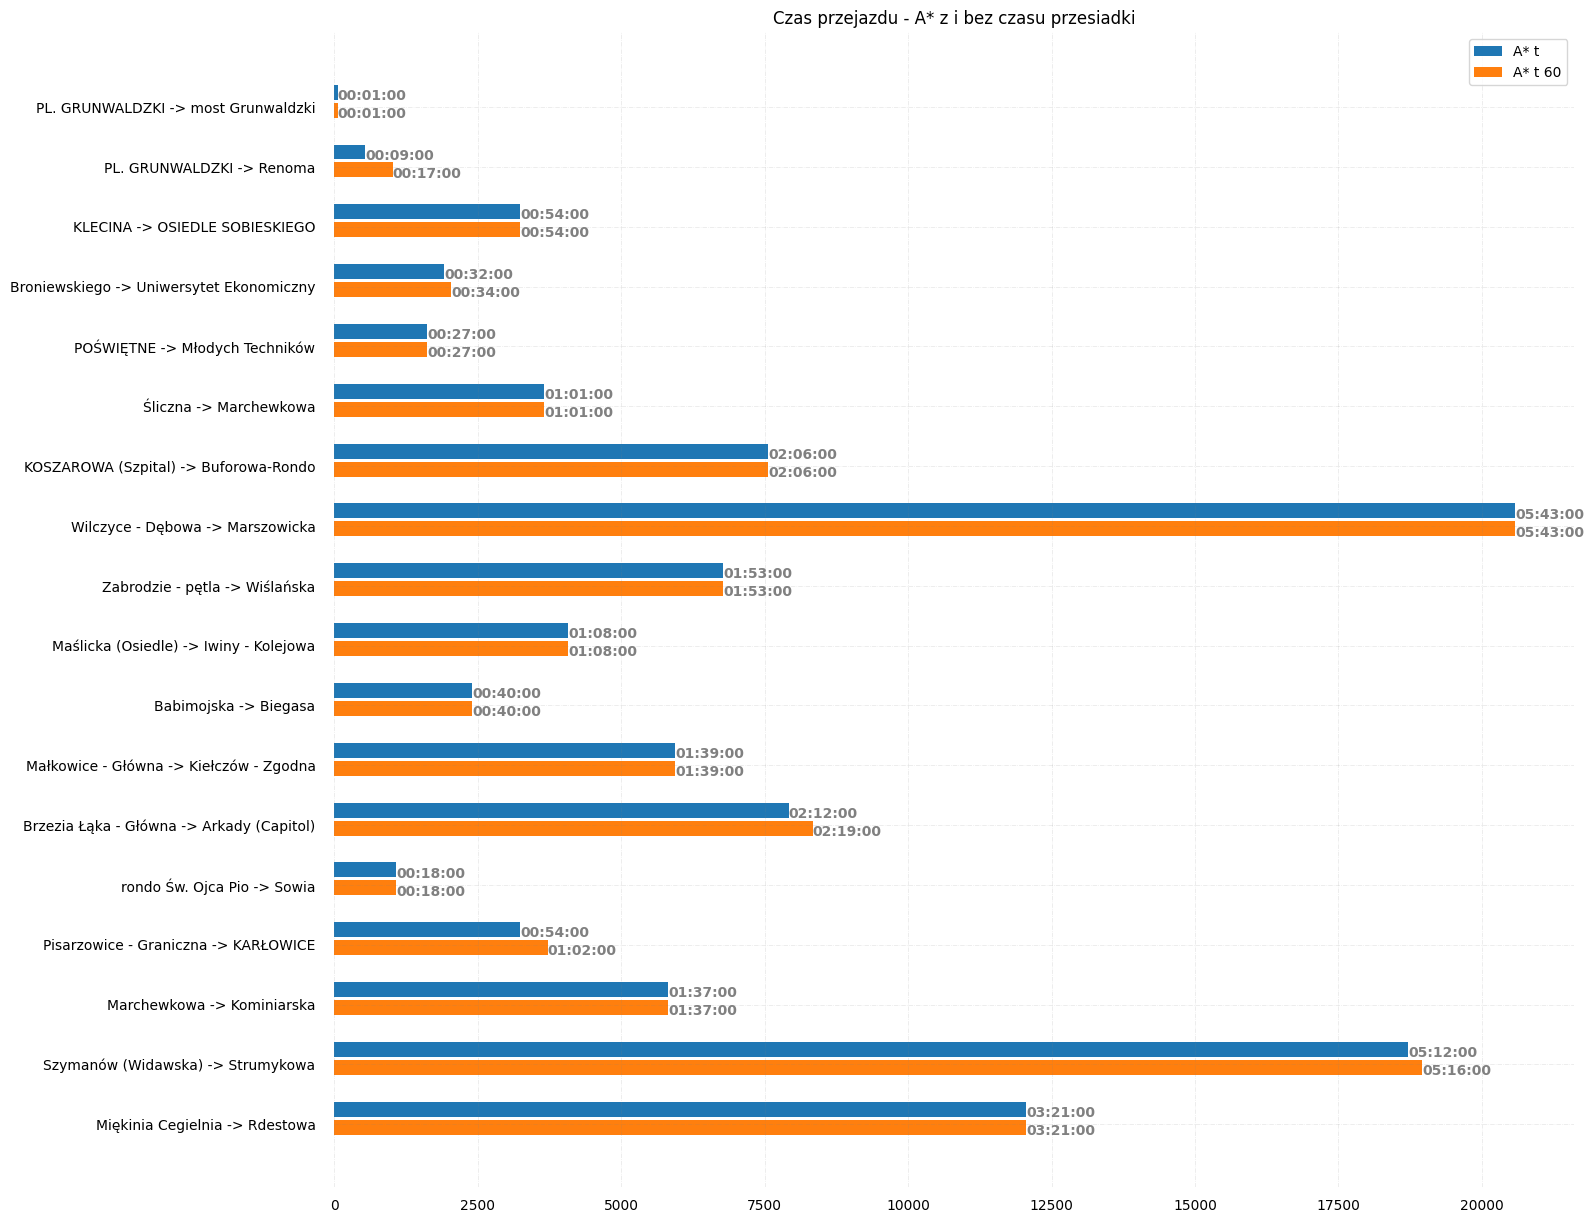

In [11]:
bar_plot_compare([a_star_t, a_star_t_60], ['A* t', 'A* t 60'], col_idx=2, title='Czas przejazdu - A* z i bez czasu przesiadki', 
                 formatter=time_to_normalized_sec, display_annotation=True)

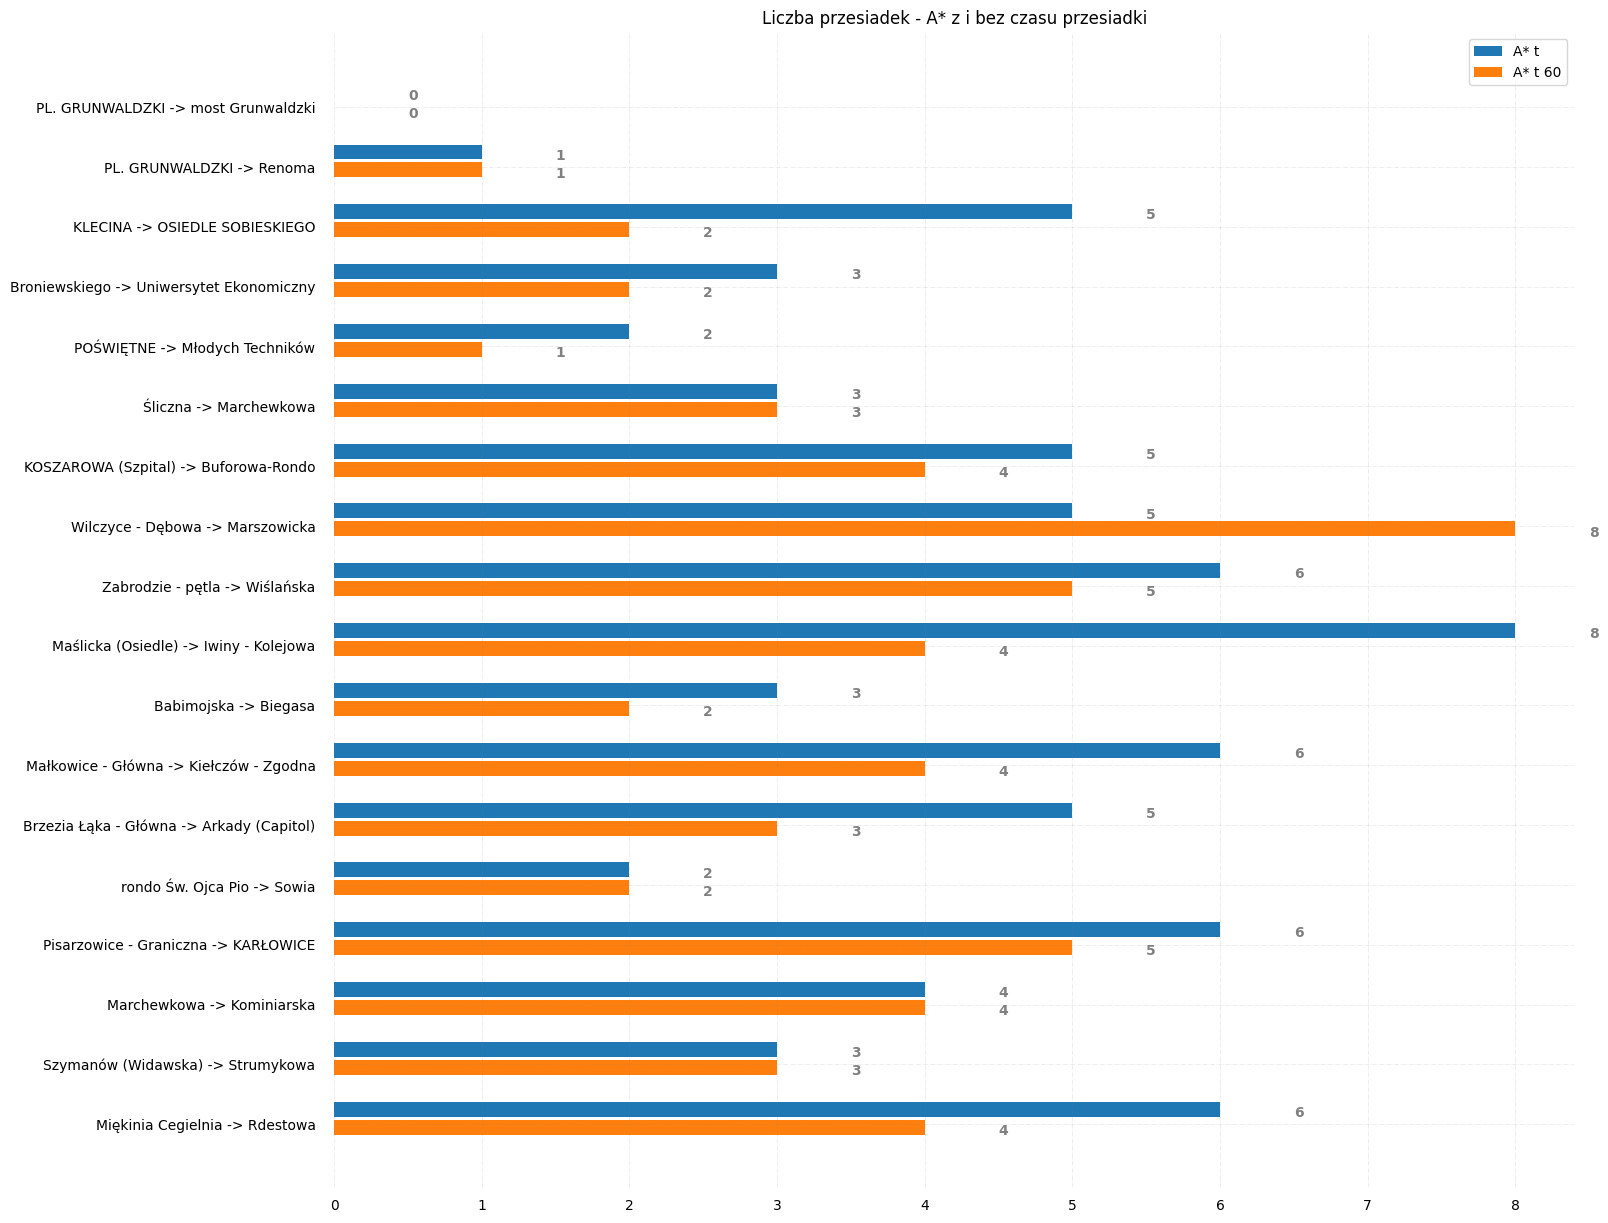

In [12]:
bar_plot_compare([a_star_t, a_star_t_60], ['A* t', 'A* t 60'], col_idx=3, title='Liczba przesiadek - A* z i bez czasu przesiadki', 
                 formatter=int, display_annotation=True)

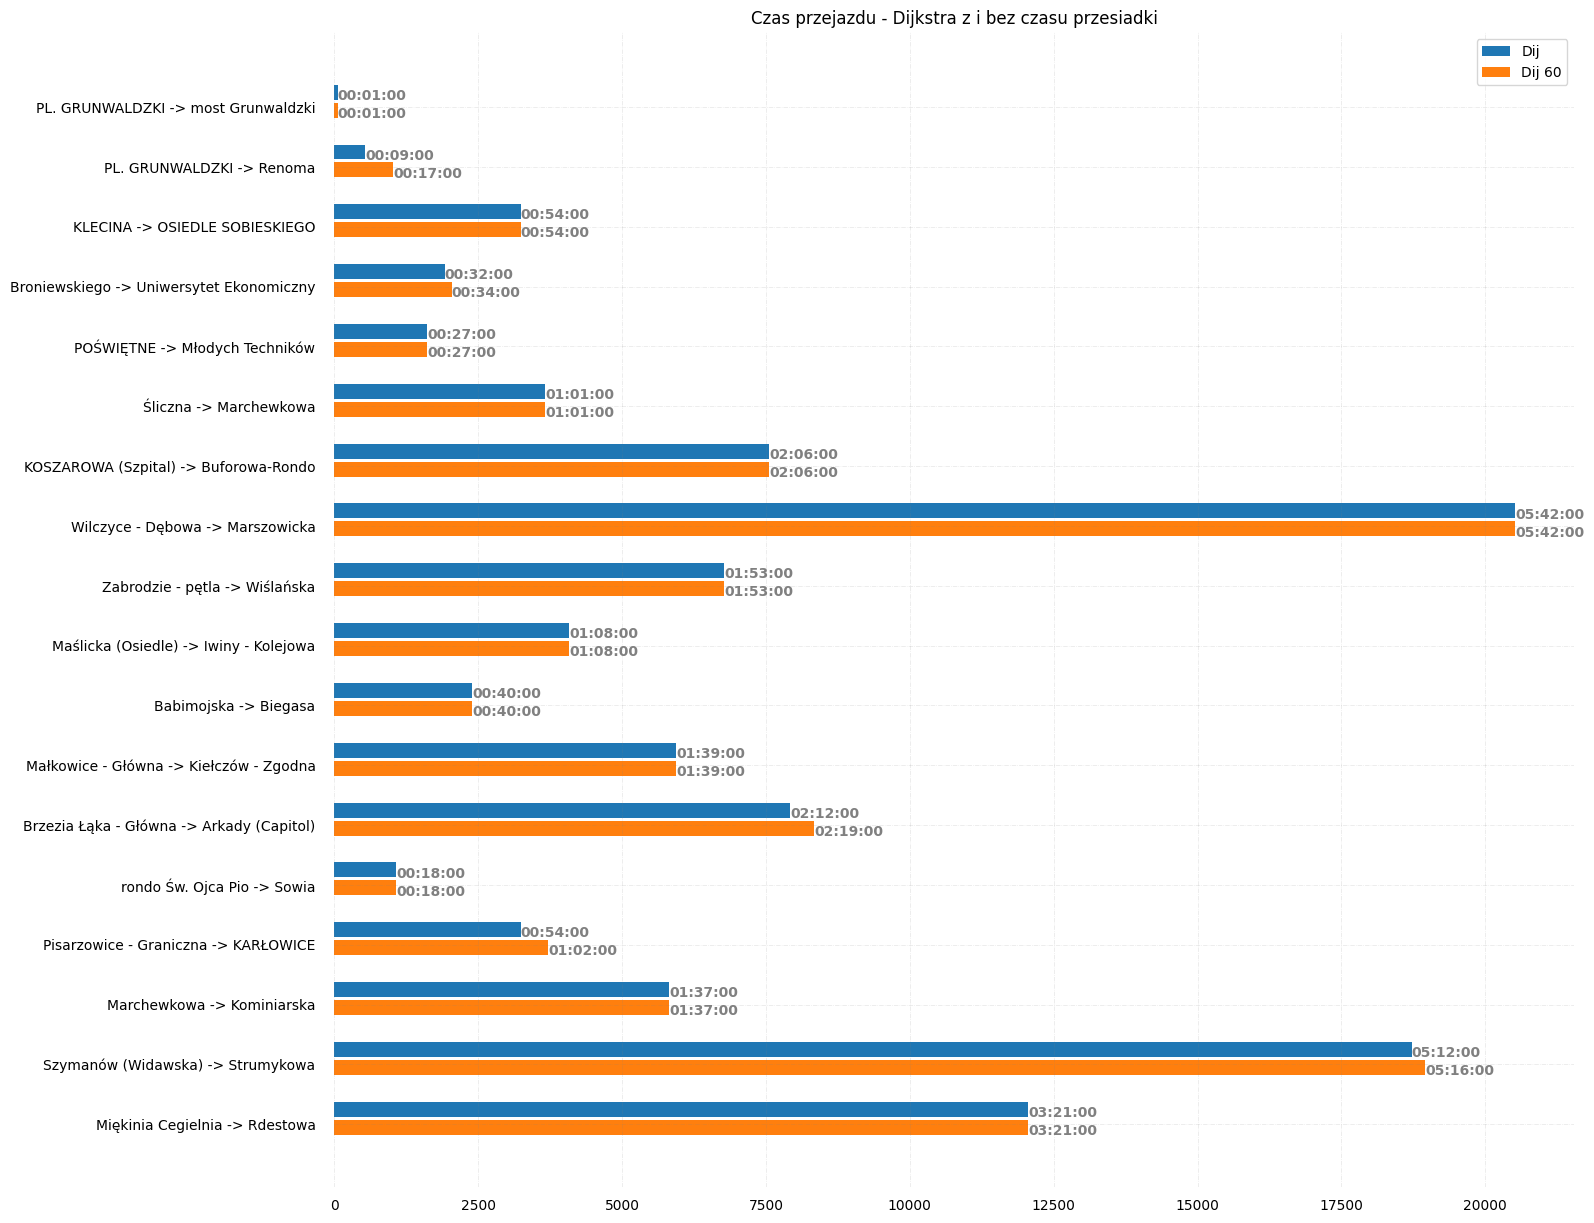

In [13]:
bar_plot_compare([dij, dij_60], ['Dij', 'Dij 60'], col_idx=2, title='Czas przejazdu - Dijkstra z i bez czasu przesiadki', 
                 formatter=time_to_normalized_sec, display_annotation=True)

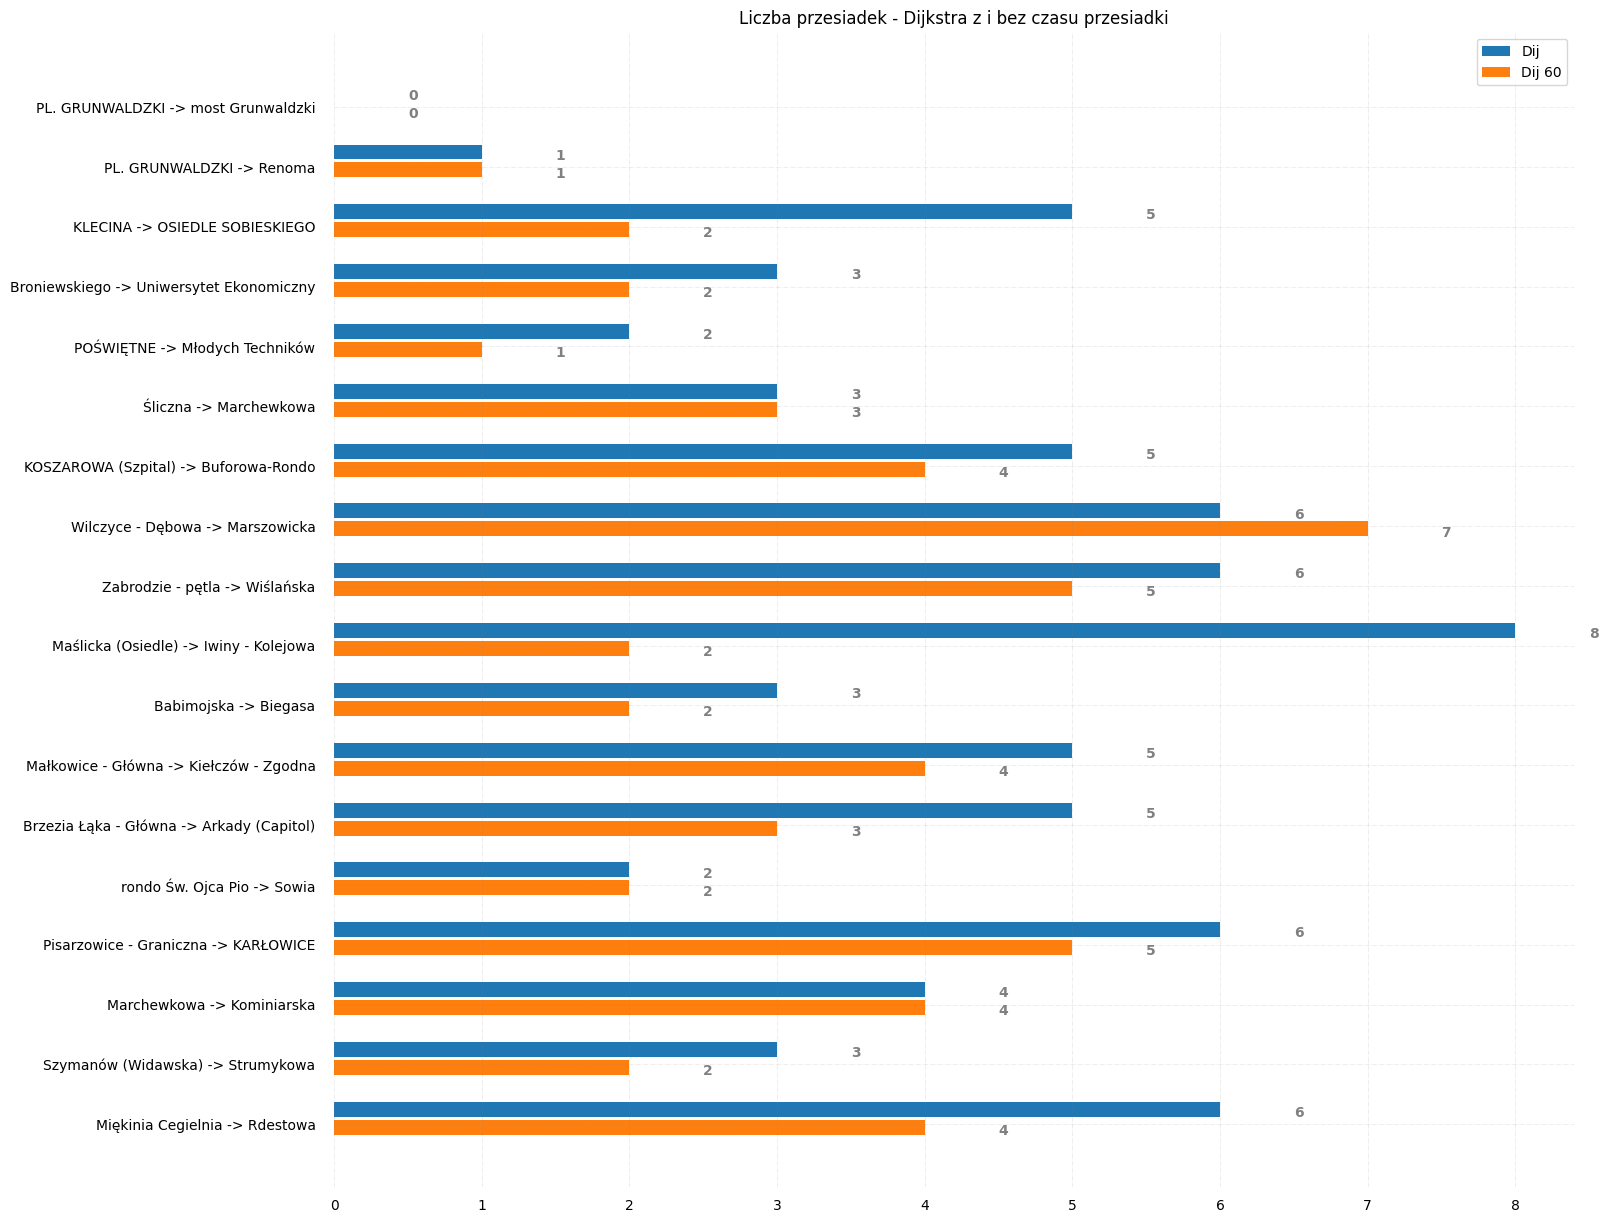

In [14]:
bar_plot_compare([dij, dij_60], ['Dij', 'Dij 60'], col_idx=3, title='Liczba przesiadek - Dijkstra z i bez czasu przesiadki', 
                 formatter=int, display_annotation=True)

#### Optymalizacja przesiadek
Ta postać problemu była bardziej skomplikowana ponieważ definicja przesiadki nie jest oczywista. W tym przypadku uznano, że doszło do przesiadki gdy
- nastąpiła zmiana lini
- nastąpiło przejście do sąsiedniego przystanku
- czas między przyjazdem a odjazdem jest 'długi' (bez tego wpadamy w przejazdy z innego kursu), jako maksymalną długość przejazdu między przystankami przyjęto 99 percentyl czasu między przejazdami dla tego zbioru, czyli 4 minuty.

Heurystyka polega na oszacowaniu liczby przesiadek w zależności od odległości od przystanku końcowego i aktualnej, już dokonanej liczby przesiadek. Heurystyka również faworyzuje początkowe połączenie, które jest najszybciej (tj. by zacząć podróż jak najszybciej).

In [23]:
a_star_p = pd.read_csv(DATA_DIR / 'debug-new/a-star-p/summary0', names=header)

In [24]:
a_star_p

,start_stop,goal_stop,commuting_time,changes,elapsed_time,cost,change_time
0,PL. GRUNWALDZKI,most Grunwaldzki,00:01:00,0,2.99,0,0
1,PL. GRUNWALDZKI,Renoma,00:09:00,0,3.90,0,0
2,KLECINA,OSIEDLE SOBIESKIEGO,00:54:00,0,10.58,0,0
3,Broniewskiego,Uniwersytet Ekonomiczny,00:37:00,0,10.04,0,0
4,POŚWIĘTNE,Młodych Techników,13:11:00,1,10.53,1,0
5,Śliczna,Marchewkowa,04:54:00,1,13.58,1,0
6,KOSZAROWA (Szpital),Buforowa-Rondo,02:10:00,1,7.71,1,0
7,Wilczyce - Dębowa,Marszowicka,07:28:00,3,158.49,3,0
8,Zabrodzie - pętla,Wiślańska,04:07:00,2,65.68,2,0
9,Maślicka (Osiedle),Iwiny - Kolejowa,14:58:00,3,260.23,3,0


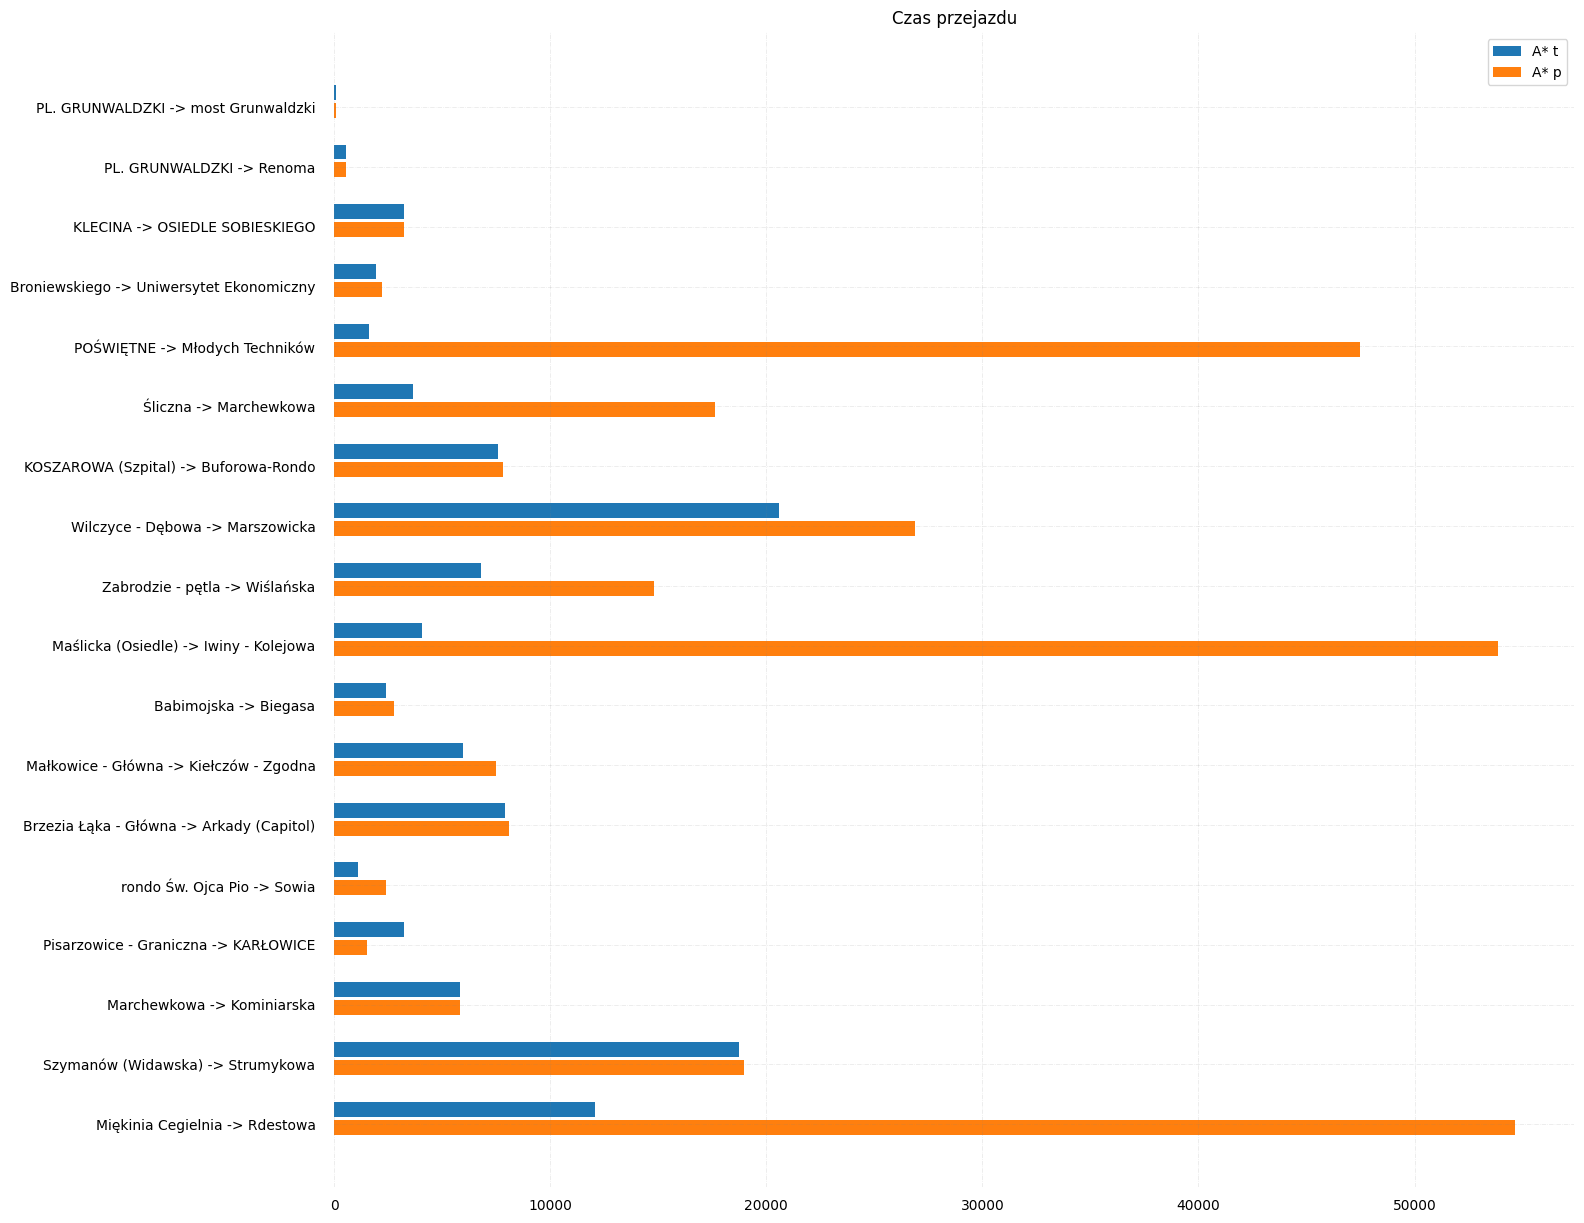

In [25]:
bar_plot_compare([a_star_t, a_star_p], ['A* t', 'A* p'], col_idx=2, title='Czas przejazdu', formatter=time_to_normalized_sec, display_annotation=False)

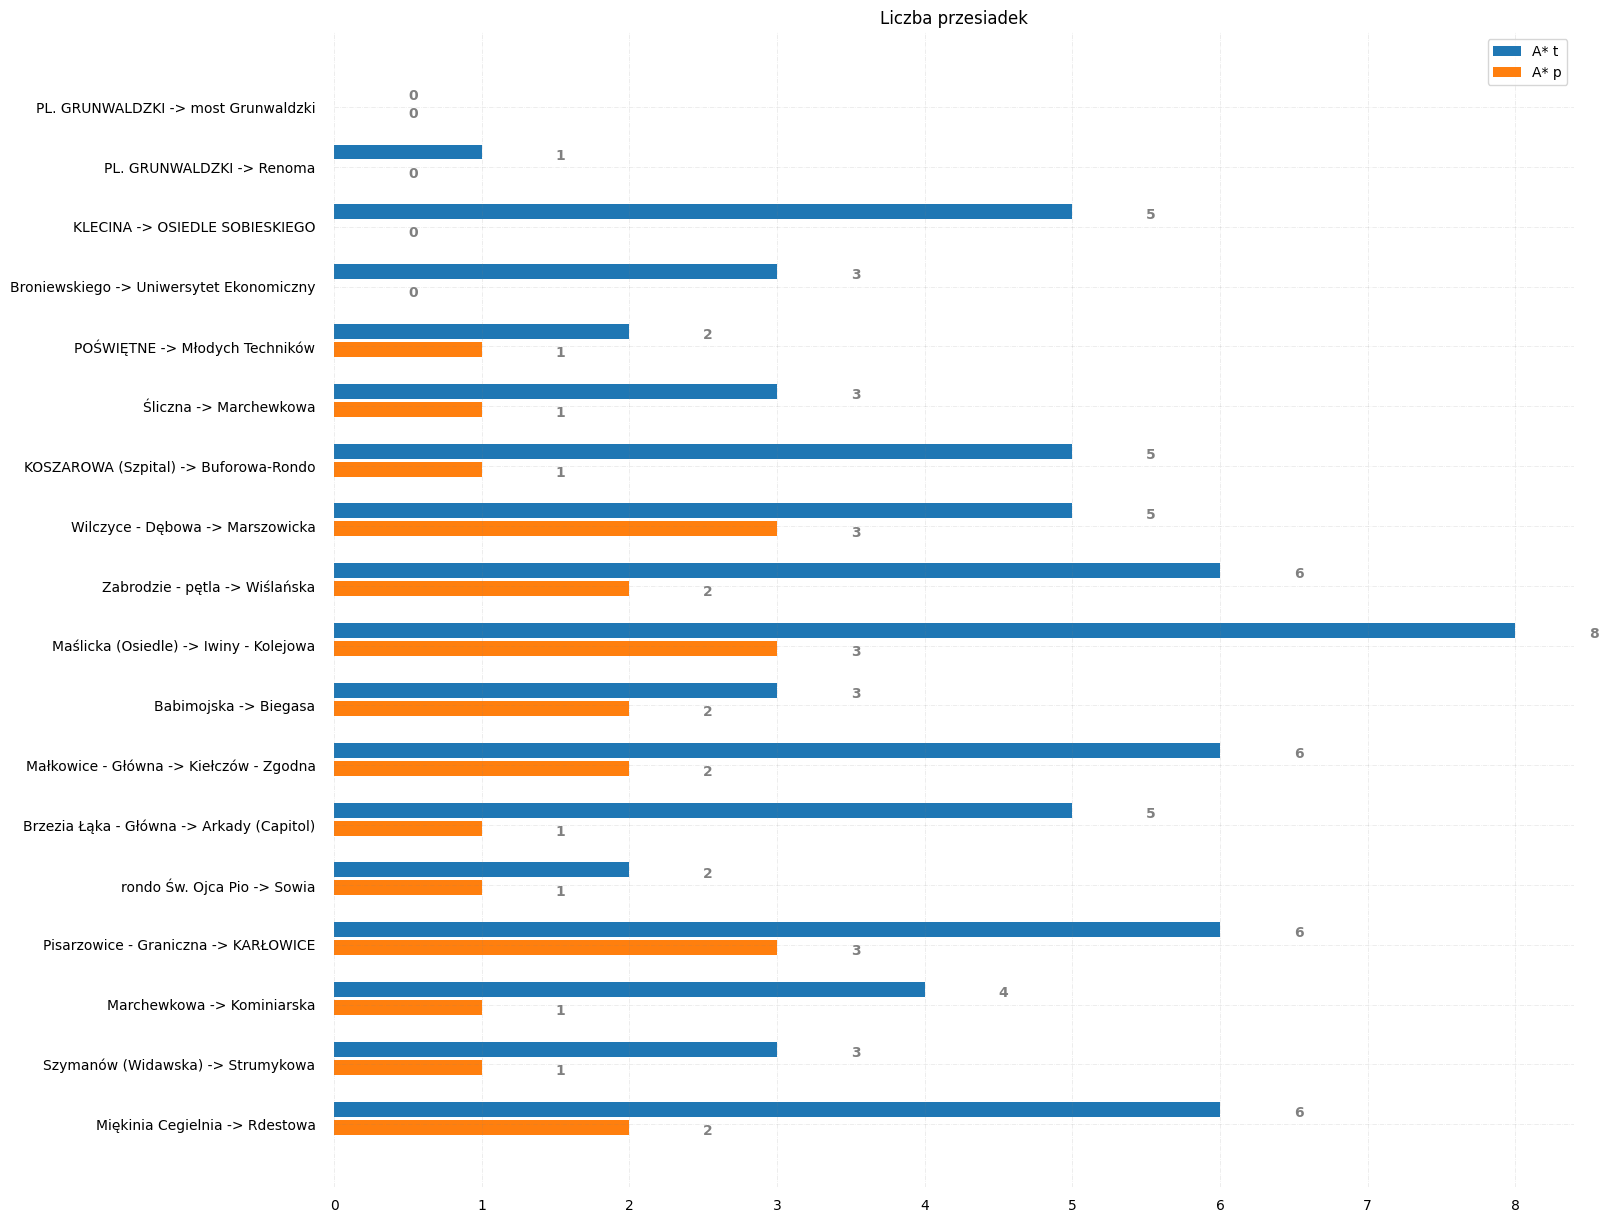

In [26]:
bar_plot_compare([a_star_t, a_star_p], ['A* t', 'A* p'], col_idx=3, title='Liczba przesiadek', formatter=int, display_annotation=True)

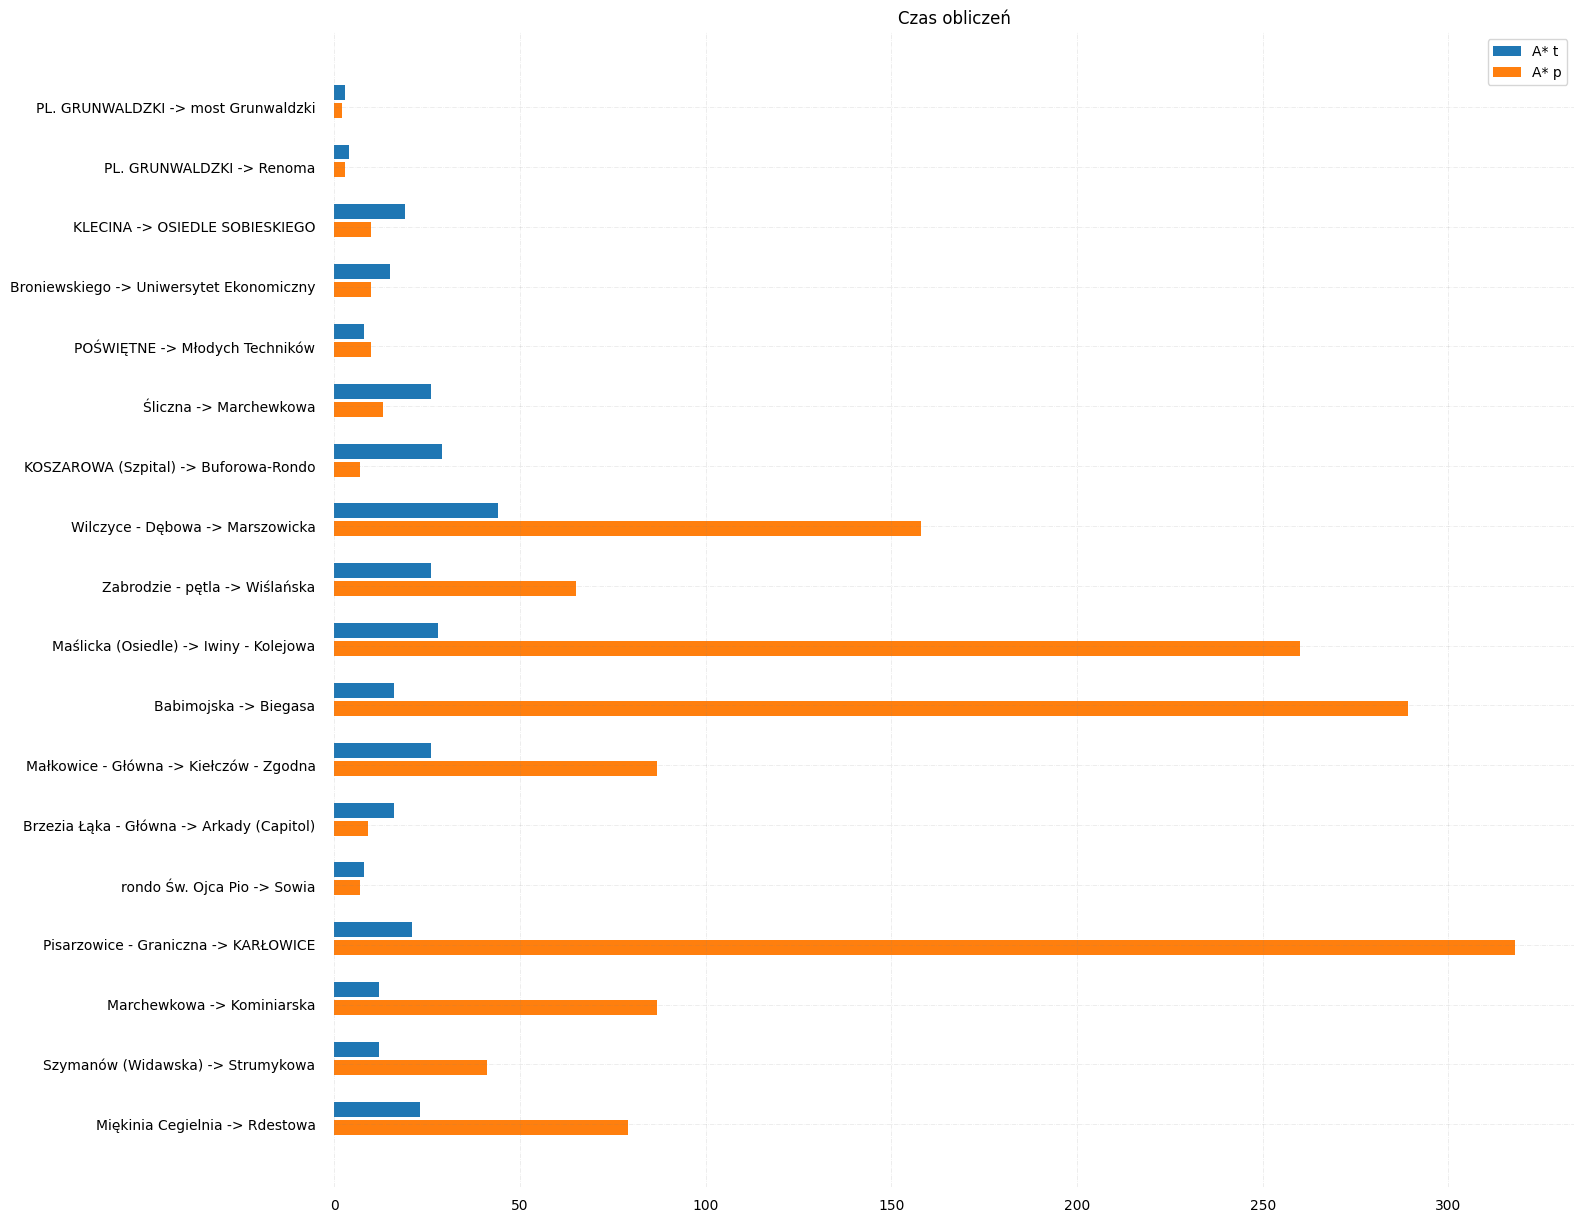

In [27]:
bar_plot_compare([a_star_t, a_star_p], ['A* t', 'A* p'], col_idx=4, title='Czas obliczeń', formatter=int, display_annotation=False)

#### Modyfikacja - optymalizacja czasu i liczby przesiadek 

Modyfikacja dotyczyła zaimplementowania nowej funkcji kosztu i heurystyki, które liczą średnią ważoną kosztów czasu przejazdu i przesiadek A$^*$. Porównując wyniki do $A^* t$ można zauważyć, że odnajduje on prawie tak samo optymalne pod względem czasowym trasy, oraz w porównaniu do $A^*p$ modyfikuje liczbę przesiadek. Wagi dla obu strat zostały wybrane na 'oko', więc prawdopodobnie możliwe byłoby dobranie lepszych wartości tych hiperparametrów. 

In [32]:
a_star_t_custom = pd.read_csv(RESULTS / 'a-star-custom/summary0', names=header)

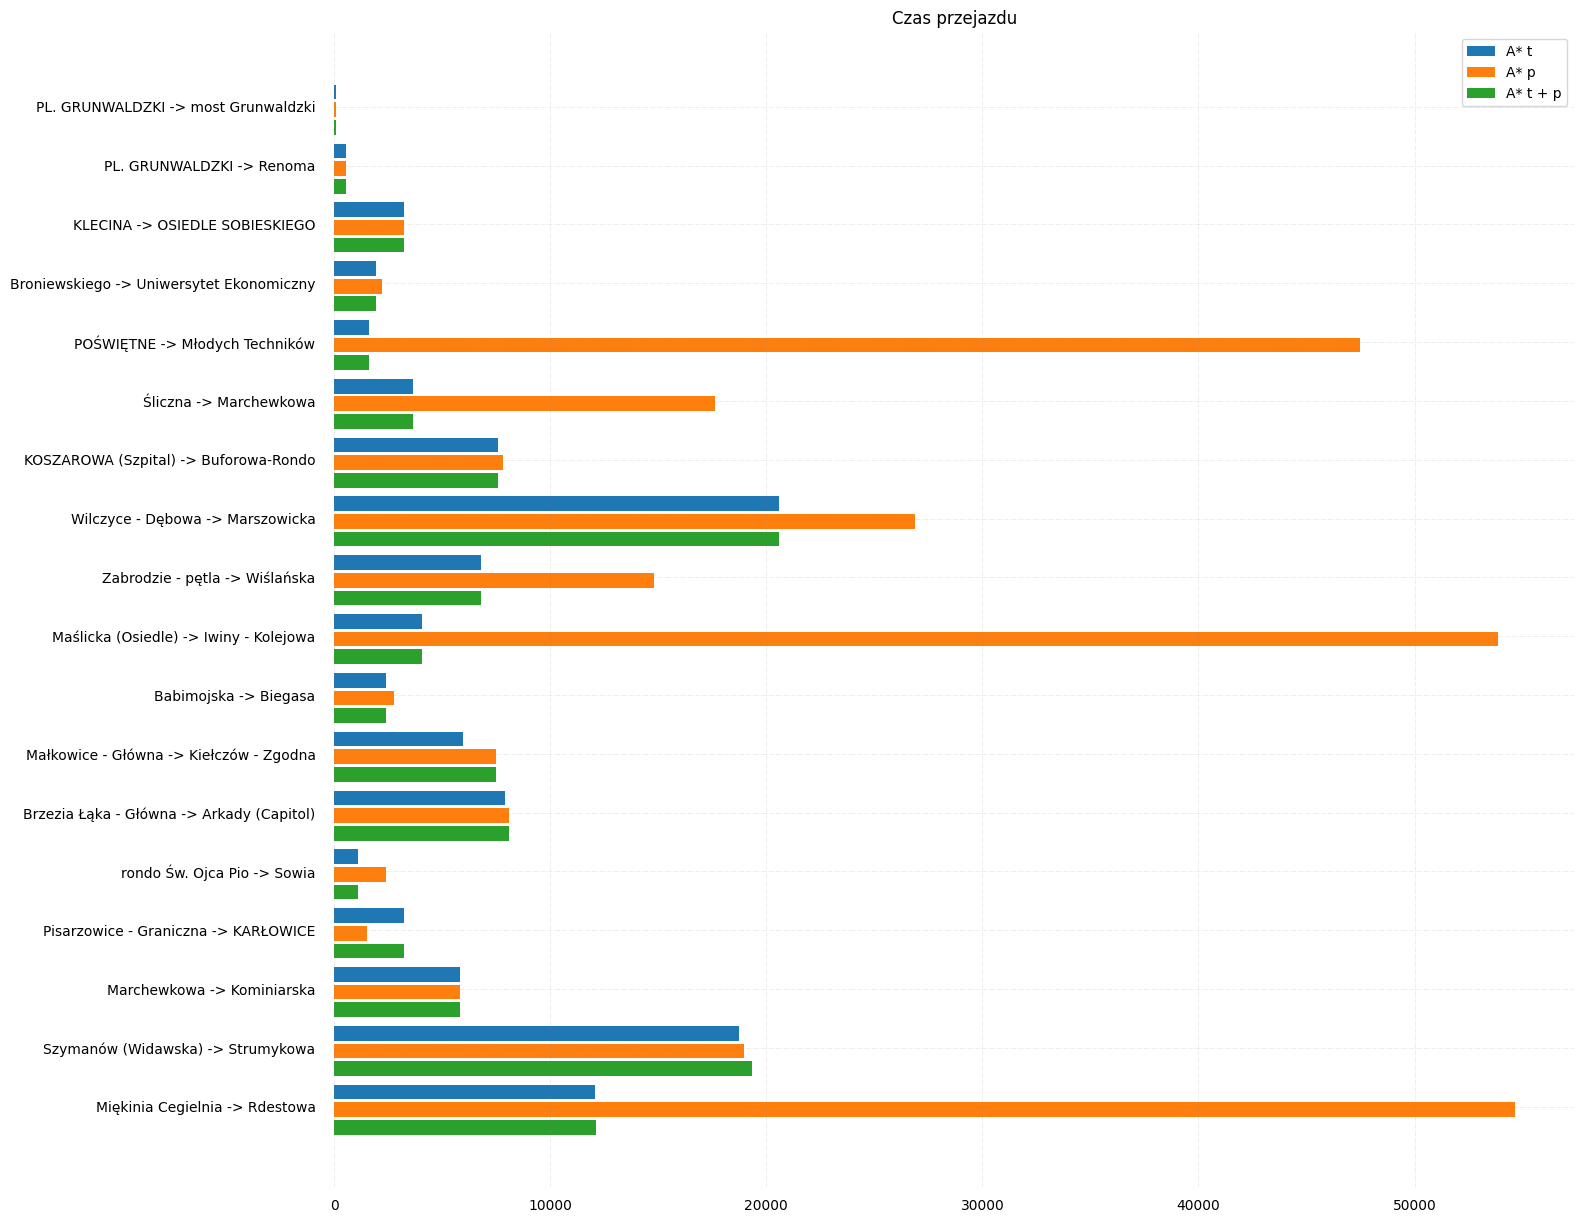

In [33]:
bar_plot_compare([a_star_t, a_star_p, a_star_t_custom], ['A* t', 'A* p', 'A* t + p'], col_idx=2, title='Czas przejazdu', formatter=time_to_normalized_sec, display_annotation=False)

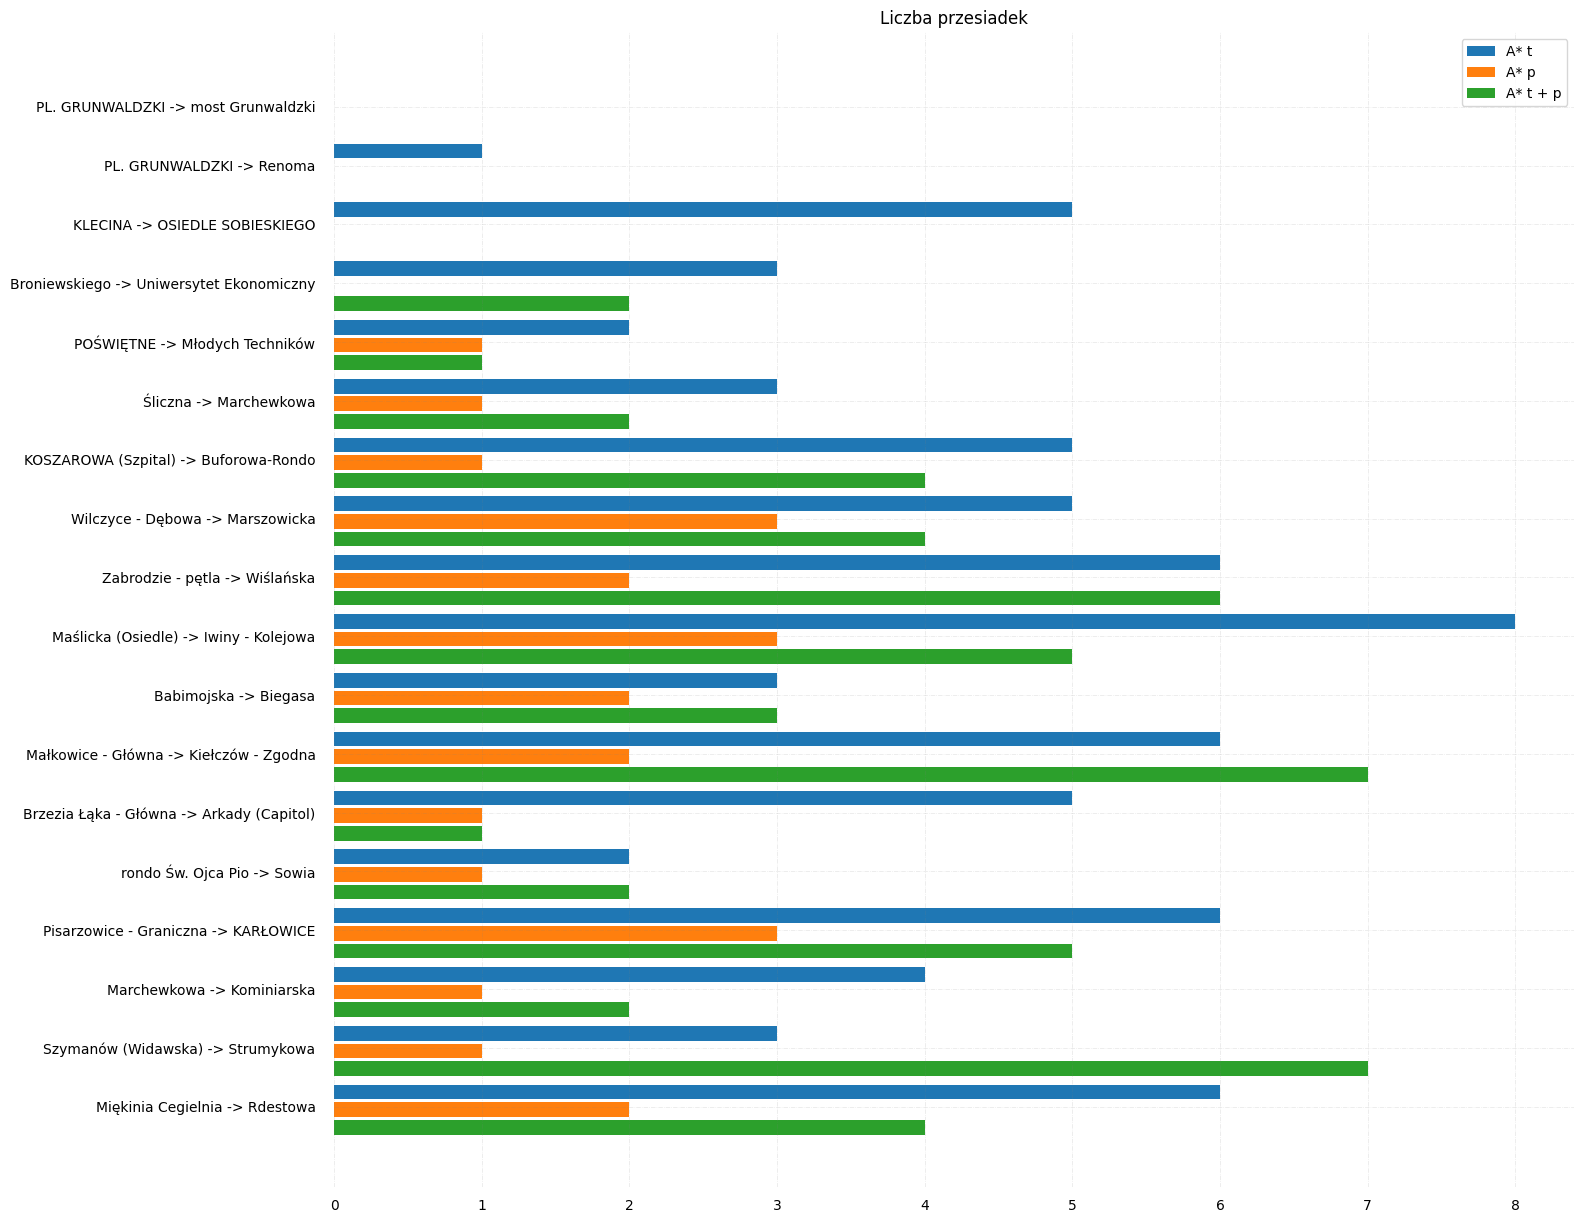

In [34]:
bar_plot_compare([a_star_t, a_star_p, a_star_t_custom], ['A* t', 'A* p', 'A* t + p'], col_idx=3, title='Liczba przesiadek', formatter=int, display_annotation=False)

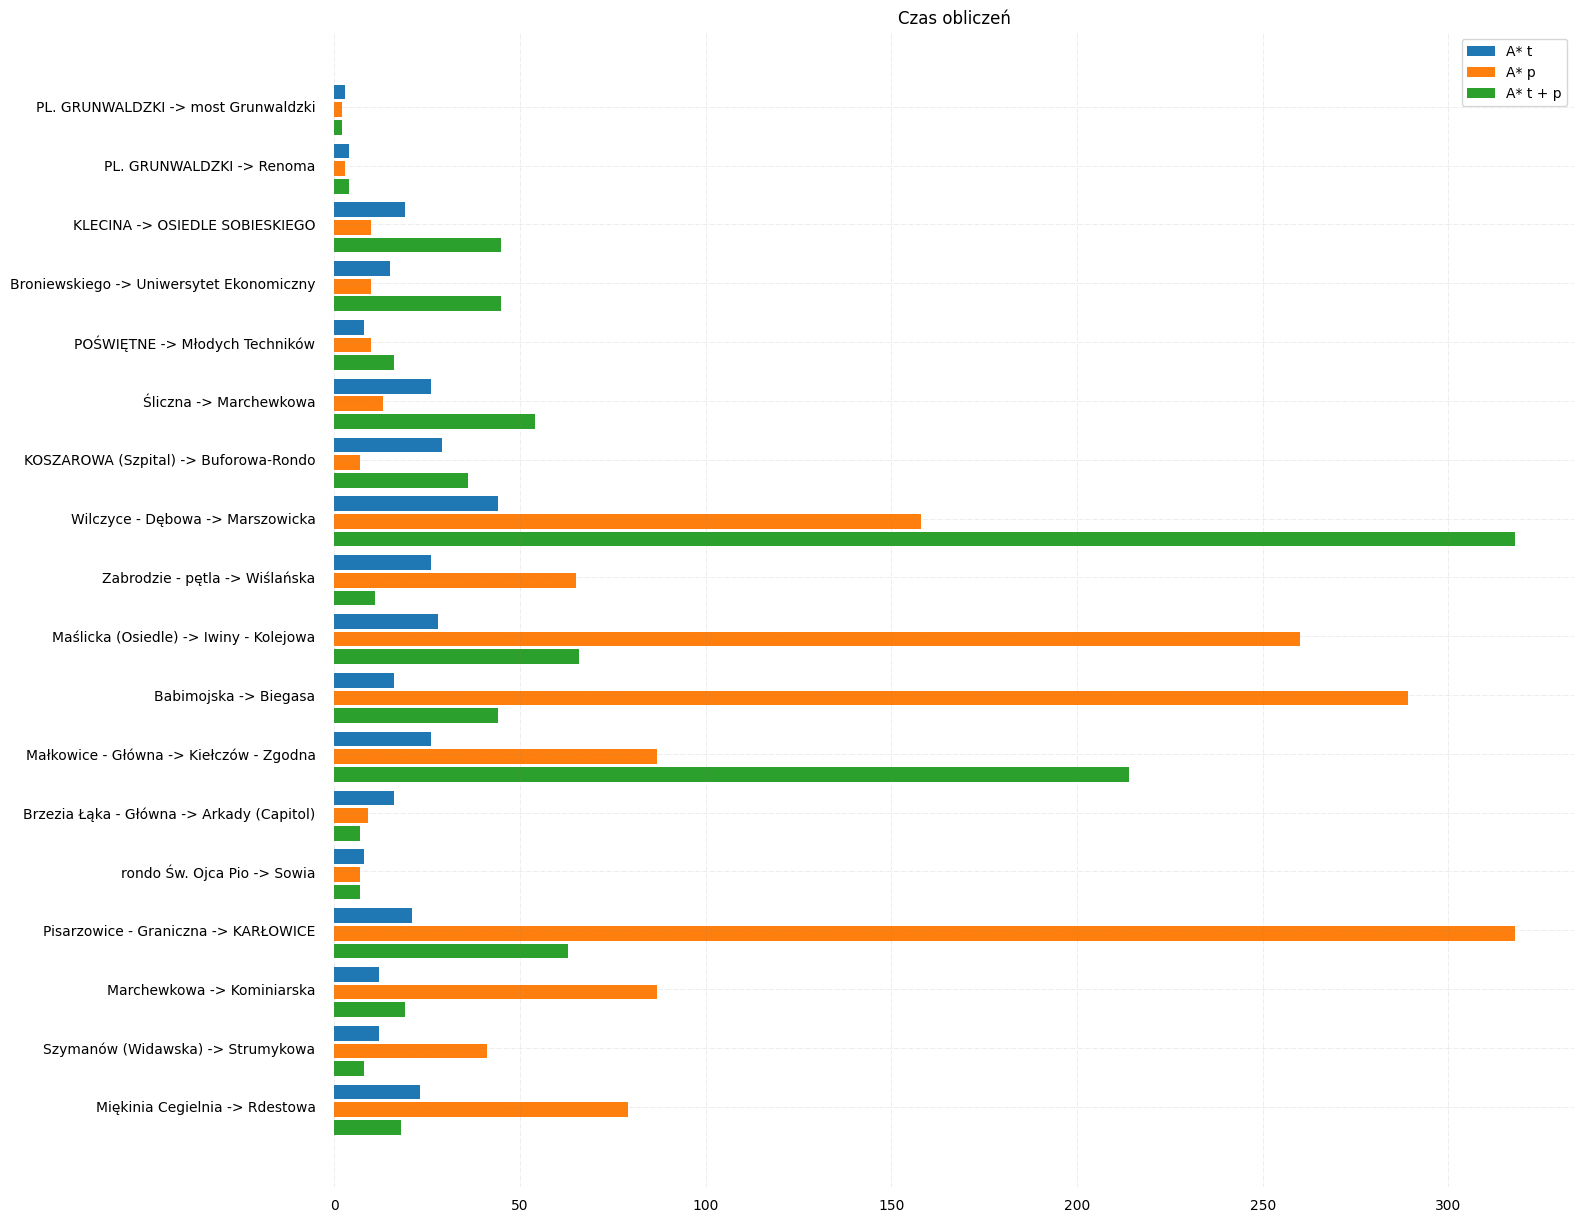

In [35]:
bar_plot_compare([a_star_t, a_star_p, a_star_t_custom], ['A* t', 'A* p', 'A* t + p'], col_idx=4, title='Czas obliczeń', formatter=int, display_annotation=False)

### Tabu Search